In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

In [9]:
file_name='https://cocl.us/datascience_survey_data'
df=pd.read_csv(file_name,index_col=0)
df.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


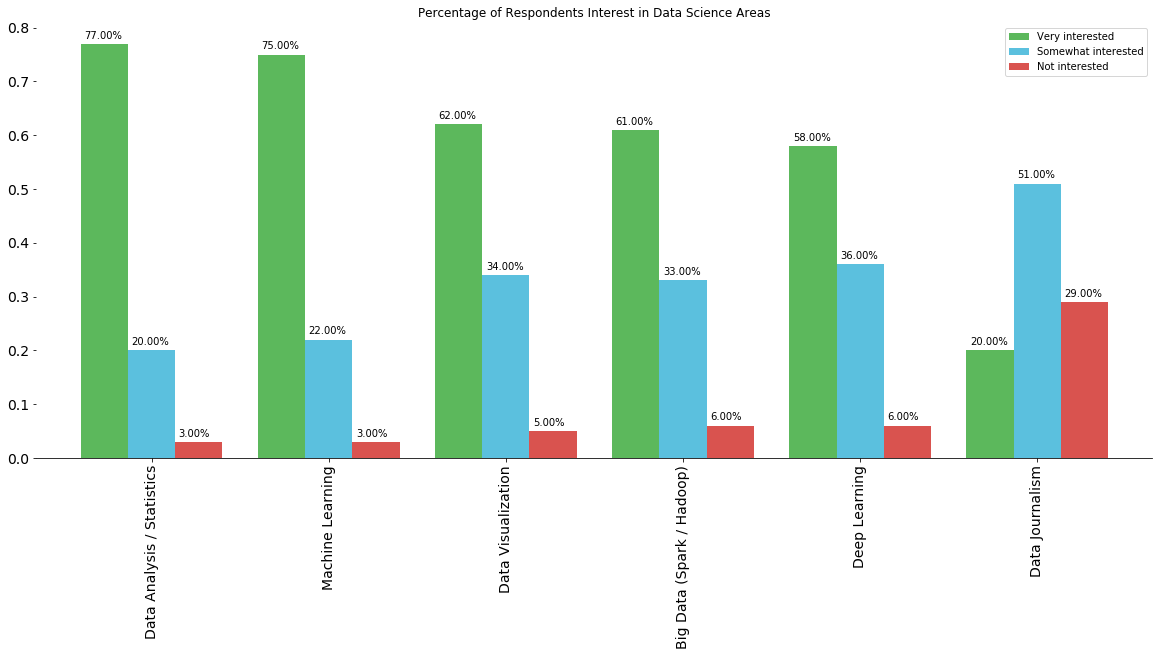

In [12]:
df.sort_values("Very interested", axis = 0, ascending = False,inplace = True, na_position ='last') 
cols = ['Very interested', 'Somewhat interested', 'Not interested']
df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0).round(2)
ax = df.plot(kind ='bar', title='Percentage of Respondents Interest in Data Science Areas', figsize=(20,8), fontsize=14,width= 0.8,color=['#5cb85c', '#5bc0de', '#d9534f'])
ax =plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#plot = plt.bar(x = 'Very interested', cols)
for p in ax.patches:
    ax.annotate("{:.2%}".format(p.get_height()),
                xy=(p.get_x()+0.02, p.get_height()+0.01))

In [25]:
file_name='https://cocl.us/sanfran_crime_dataset'
df=pd.read_csv(file_name,index_col= None)
df.rename(columns={'PdDistrict':'Count'}, inplace=True)
df.head()
df['Count'].value_counts().to_frame()


,Count
SOUTHERN,28445
NORTHERN,20100
MISSION,19503
CENTRAL,17666
BAYVIEW,14303
INGLESIDE,11594
TARAVAL,11325
TENDERLOIN,9942
RICHMOND,8922
PARK,8699


In [26]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

In [27]:
!wget --quiet https://cocl.us/sanfran_geojson
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [46]:
file_name='https://cocl.us/sanfran_crime_dataset'
world_geo = r'world_countries.json' # geojson file
df_incidents = pd.read_csv(file_name)
df_incidents.head()
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]
df_incidents.shape
latitude = 37.77
longitude = -122.42
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
sanfran_map.choropleth(
    geo_data=world_geo,
    data=df_incidents,
   columns=['PdDistrict'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in sanfranscico')


# display the map of San Francisco
sanfran_map


IndexError: list index out of range